In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = pd.read_csv('WineQT.csv')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
display(data.head())

# Información general del dataset
print("\nInformación del dataset:")
data.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(data.describe())

Primeras filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB

Estadísticas descriptivas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000



Valores nulos:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

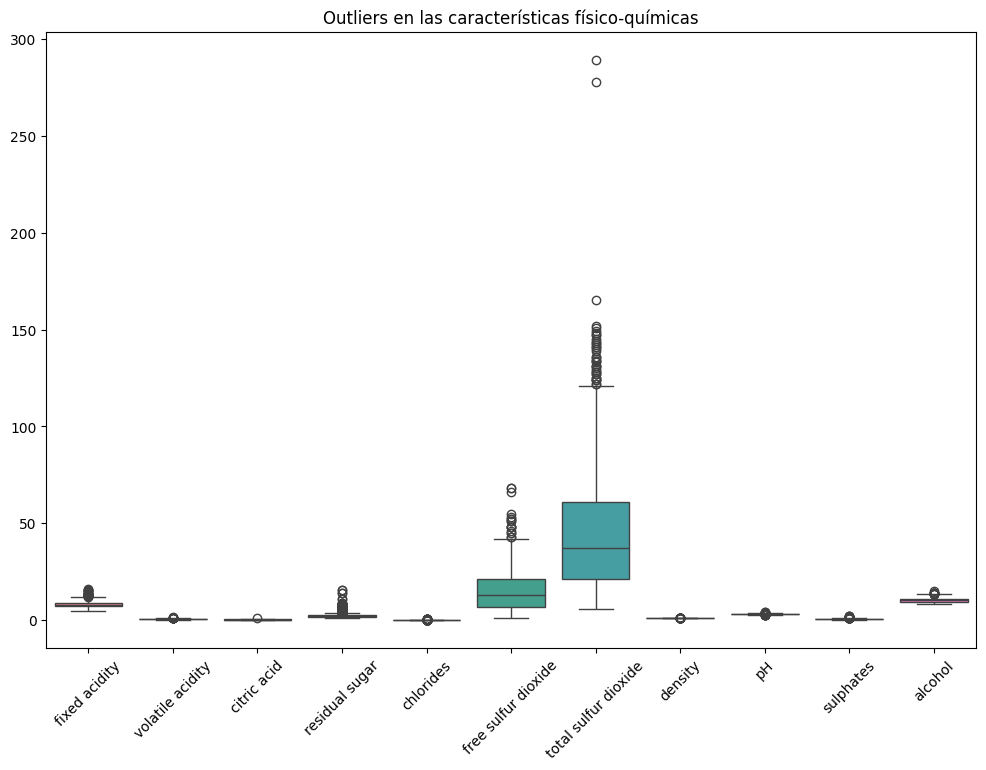

In [2]:
# Verificar valores nulos
print("\nValores nulos:")
display(data.isnull().sum())

# Identificar outliers con diagramas de caja
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['Id', 'quality']))
plt.title("Outliers en las características físico-químicas")
plt.xticks(rotation=45)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selección de características y variable objetivo
X = data.drop(columns=['quality', 'Id'])  # Variables independientes
y = data['quality']  # Variable dependiente

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluar el modelo
y_pred_knn = knn.predict(X_test)
print("Reporte de clasificación para KNN:")
print(classification_report(y_test, y_pred_knn))
print("Matriz de confusión para KNN:")
print(confusion_matrix(y_test, y_pred_knn))

Reporte de clasificación para KNN:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.61      0.69      0.64        96
           6       0.54      0.56      0.55        99
           7       0.44      0.27      0.33        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.32      0.30      0.31       229
weighted avg       0.54      0.56      0.55       229

Matriz de confusión para KNN:
[[ 0  4  2  0  0]
 [ 2 66 28  0  0]
 [ 1 34 55  9  0]
 [ 0  5 14  7  0]
 [ 0  0  2  0  0]]


/Users/morkand/Desktop/MachineLearning/Core1/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/morkand/Desktop/MachineLearning/Core1/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/morkand/Desktop/MachineLearning/Core1/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluar el modelo
y_pred_rf = rf.predict(X_test)
print("Reporte de clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión para Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.79      0.75        96
           6       0.66      0.66      0.66        99
           7       0.75      0.69      0.72        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.69      0.68       229

Matriz de confusión para Random Forest:
[[ 0  3  3  0  0]
 [ 0 76 20  0  0]
 [ 0 28 65  6  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]


/Users/morkand/Desktop/MachineLearning/Core1/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/morkand/Desktop/MachineLearning/Core1/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/morkand/Desktop/MachineLearning/Core1/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [6]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de Regresión Logística
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Evaluar el modelo
y_pred_lr = lr.predict(X_test)
print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_lr))
print("Matriz de confusión para Regresión Logística:")
print(confusion_matrix(y_test, y_pred_lr))

Reporte de clasificación para Regresión Logística:


/Users/morkand/Desktop/MachineLearning/Core1/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.62      0.64      0.63        99
           7       0.48      0.42      0.45        26
           8       0.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.36      0.36      0.36       229
weighted avg       0.61      0.63      0.62       229

Matriz de confusión para Regresión Logística:
[[ 0  3  3  0  0]
 [ 1 70 23  2  0]
 [ 0 28 63  8  0]
 [ 0  2 13 11  0]
 [ 0  0  0  2  0]]


/Users/morkand/Desktop/MachineLearning/Core1/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/morkand/Desktop/MachineLearning/Core1/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


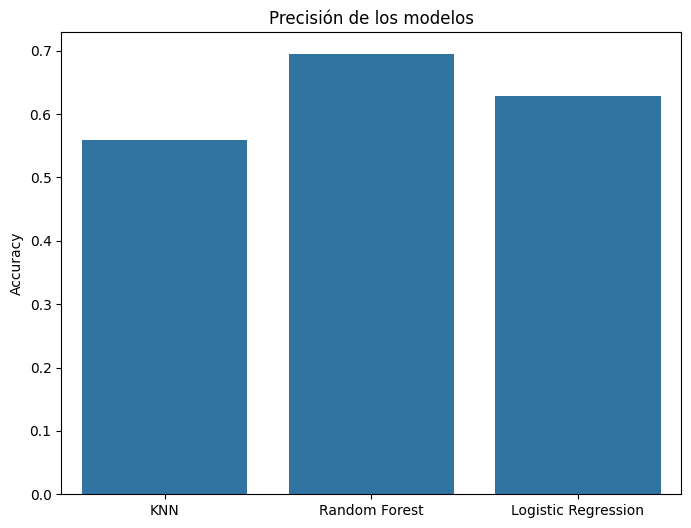

In [7]:
# Comparar precisión entre modelos
models = ['KNN', 'Random Forest', 'Logistic Regression']
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_lr)
]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.title("Precisión de los modelos")
plt.ylabel("Accuracy")
plt.show()